In [44]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import torch
import matplotlib.pyplot as plt
from scipy.linalg import hadamard
from block import block, generators, plot
import math
import numpy as np
import pandas as pd
import plotly.express as px

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
# Generate data points
X = np.linspace(-4, 4, 31)
Y = np.linspace(-4, 4, 31)
Theta = [0]#np.linspace(-200, 200, 10)
F = []

a = generators.gen_rand_block(8, lambda: 0.25)
b = a.mate()
x_flat = []
y_flat = []
theta_flat = []
f_flat = []
i = 0
for theta in Theta:
    cpyt = b.clone()
    cpyt.rotate(theta)
    for x in X:
        cpyx = cpyt.clone()
        cpyx.translate(torch.tensor([float(x), 0]))
        for y in Y:
            cpyy = cpyx.clone()
            cpyy.translate(torch.tensor([0, float(y)]))
            A, force = a.calculate_attraction(cpyy)
            f_flat.append((force.item() + 10))
            x_flat.append(x)
            y_flat.append(y)
            theta_flat.append(theta)
            i += 1

# # Create DataFrame
# df = pd.DataFrame({
#     'x': x_flat,
#     'y': y_flat,
#     'theta': theta_flat,
#     'f': f_flat
# })

# # Plot 3D scatter plot
# fig = px.scatter_3d(df, x='x', y='y', z='theta', color='f', size='f', size_max=10)
# fig.update_layout(title='3D Scatter Plot of f(x, y, theta)')
# fig.update_traces(marker=dict(size=3))  # Adjust size as needed
# fig.show()


In [43]:
import plotly.graph_objects as go
import numpy as np

# Generate sample data
np.random.seed(42)
num_frames = 10
num_points = 50
x_data = np.random.rand(num_frames, num_points)
y_data = np.random.rand(num_frames, num_points)
z_data = np.random.rand(num_frames, num_points)
colors = np.random.rand(num_points)

# Create frames
frames = []
for i in range(num_frames):
    frame = go.Frame(data=[go.Scatter3d(x=x_data[i], y=y_data[i], z=z_data[i],
                                        mode='markers',
                                        marker=dict(size=8, color=colors, opacity=0.8))],
                      name=str(i))
    frames.append(frame)

# Create the initial figure
fig = go.Figure(data=[go.Scatter3d(x=x_data[0], y=y_data[0], z=z_data[0],
                                    mode='markers',
                                    marker=dict(size=8, color=colors, opacity=0.8))],
                frames=frames)

# Add animation controls
fig.update_layout(
    updatemenus=[{
        "type": "buttons",
        "buttons": [{
            "args": [None, {"frame": {"duration": 300, "redraw": True},
                             "fromcurrent": True, "transition": {"duration": 100,
                                                                  "easing": "quadratic-in-out"}}],
            "label": "Play",
            "method": "animate"
        }, {
            "args": [[None], {"frame": {"duration": 0, "redraw": True},
                              "mode": "immediate",
                              "transition": {"duration": 0}}],
            "label": "Pause",
            "method": "animate"
        }]
    }]
)

# Define slider steps
slider_steps = []
for i in range(num_frames):
    step = dict(
        method="animate",
        args=[[i], {"frame": {"duration": 0, "redraw": True},
                   "mode": "immediate",
                   "transition": {"duration": 0}}],
        label=str(i)
    )
    slider_steps.append(step)

# Add slider to layout
fig.update_layout(
    sliders=[dict(
        active=0,
        currentvalue={"prefix": "Frame:"},
        pad={"b": 10, "t": 50},
        len=0.9,
        x=0.1,
        y=0,
        steps=slider_steps
    )]
)

# Display the plot
fig.show()


In [45]:
a = generators.gen_had_block(2)
print(a) # print object
points, polarities, radii = a.as_tuple() # easily access all attributes

points:
 tensor([[-0.5000, -0.5000],
        [-0.5000,  0.5000],
        [ 0.5000, -0.5000],
        [ 0.5000,  0.5000]]),
 polarities:
 tensor([ 1,  1,  1, -1]),
 radii:
 tensor([0.5000, 0.5000, 0.5000, 0.5000]),
 numel:
 4


In [46]:
b = a.clone() # create a copy
print(b.polarities)
c = b.mate() # create a mate (all N => S, and all S => N poles)
print(c.polarities)

tensor([ 1,  1,  1, -1])
tensor([-1, -1, -1,  1])


tensor([[0.7854, 0.0000, 0.0000, -0.0000],
        [0.0000, 0.7854, 0.0000, -0.0000],
        [0.0000, 0.0000, 0.7854, -0.0000],
        [-0.0000, -0.0000, -0.0000, 0.7854]]) tensor(3.1416)
tensor([[-0.7854, -0.0000, -0.0000,  0.0000],
        [-0.0000, -0.7854, -0.0000,  0.0000],
        [-0.0000, -0.0000, -0.7854,  0.0000],
        [ 0.0000,  0.0000,  0.0000, -0.7854]]) tensor(-3.1416)


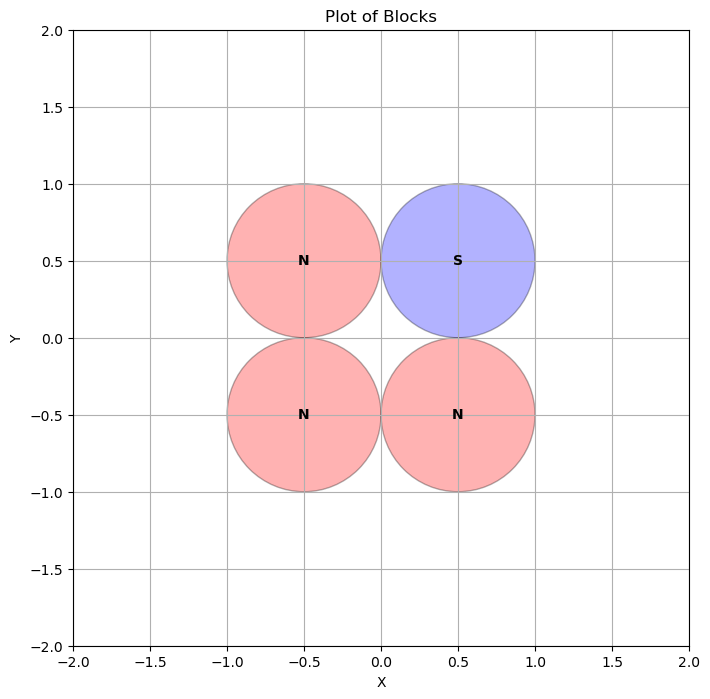

In [47]:
A, F = a.calculate_attraction(b) # get matrix of forces for each magent, and total force
print(A, F)

A, F = a.calculate_attraction(c) # with mate
print(A, F)

plot.plot_faces([a])

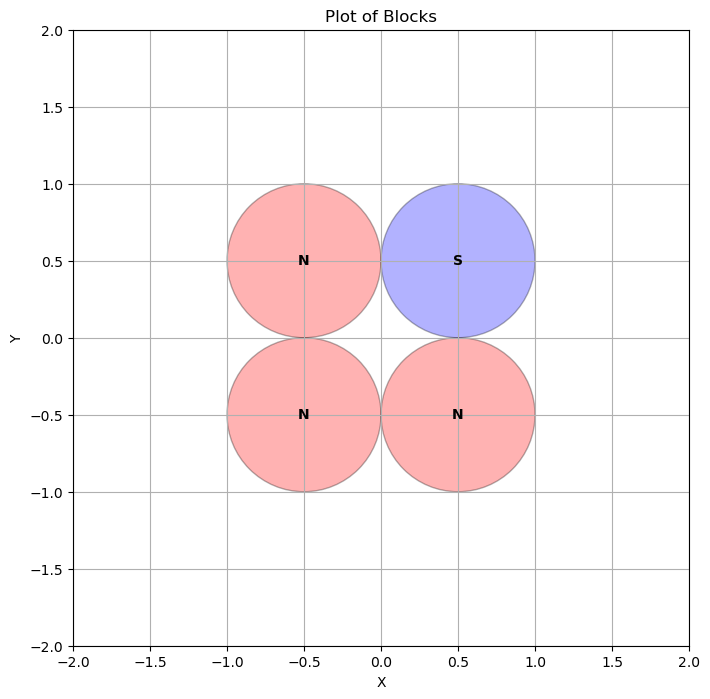

In [48]:
c = generators.gen_rand_block(6, lambda: 0.25)
d = c.mate()
# c.rotate(30)
plot.plot_faces([a])

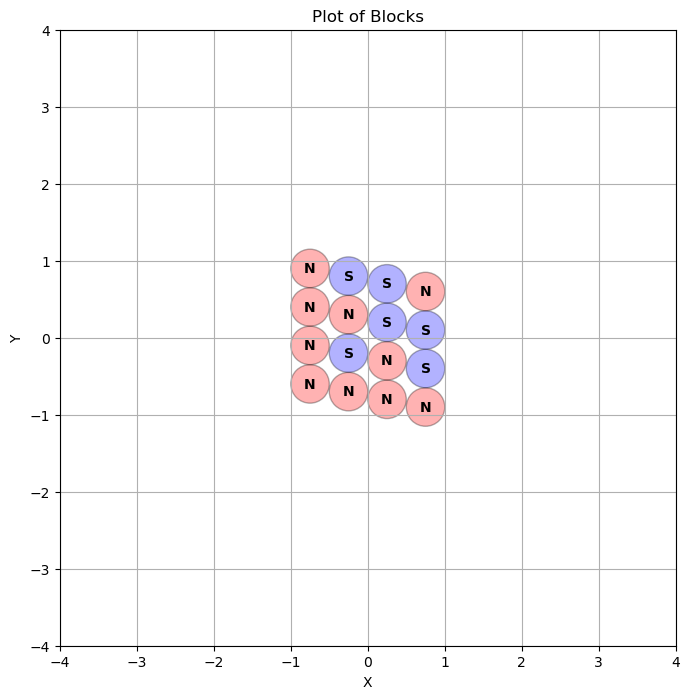

In [49]:
w = generators.gen_had_block(4)
A = torch.tensor([[1.0,-0.2],[0.0,1.0]])
w.transform(A)
plot.plot_faces([w], zoom_factor=4)

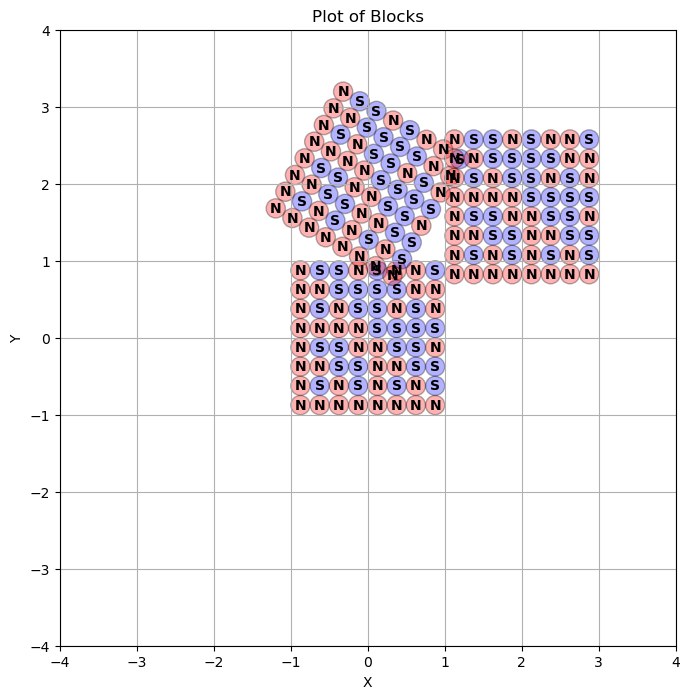

In [50]:
a = generators.gen_had_block(8)
b = a.clone()
c = b.clone()
b.rotate(30)
b.translate(torch.tensor([0, 2]))
c.translate(torch.tensor([2, 1.7]))
plot.plot_faces([a, b, c], zoom_factor=4)

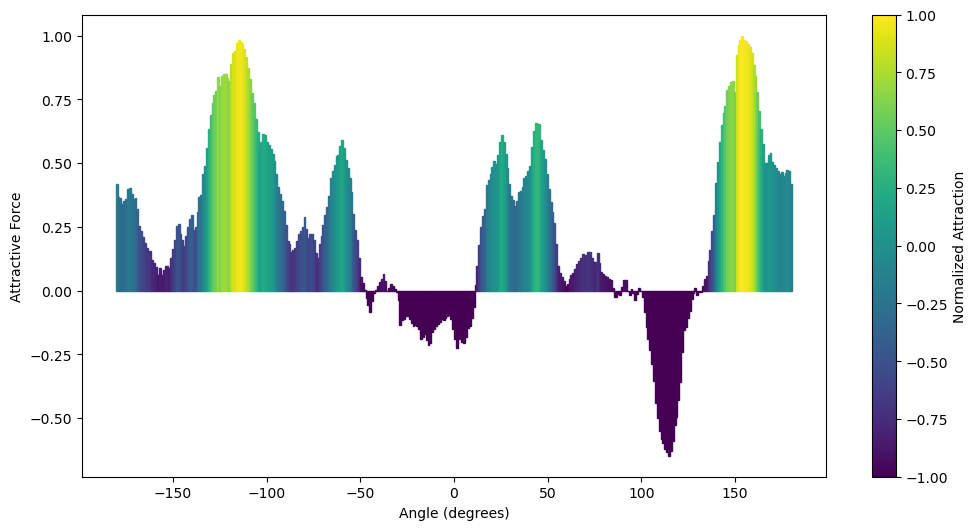

In [51]:
e = generators.gen_had_block(8)
f = e.mate()
plot.plot_rotation_attraction(a, b, num_angles=360)

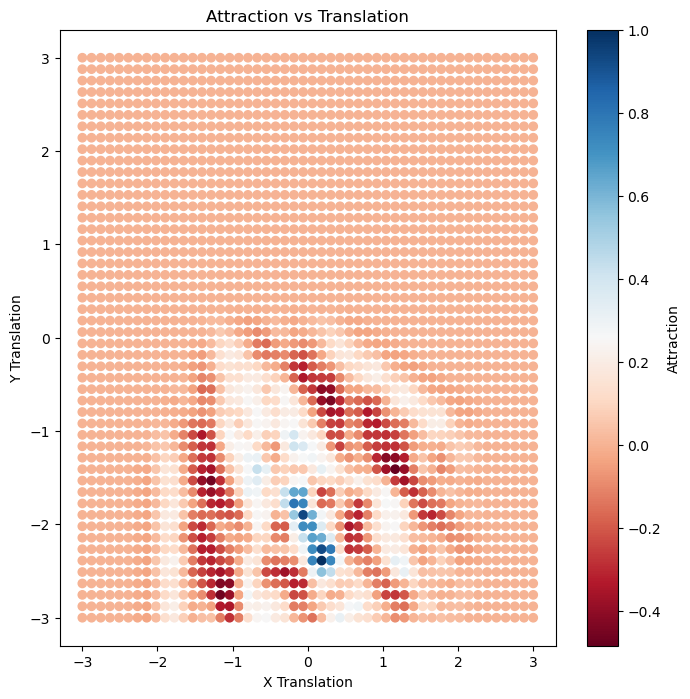

In [52]:
plot.plot_translation_attraction(a, b, 50, 50, lo=-3, hi=3)

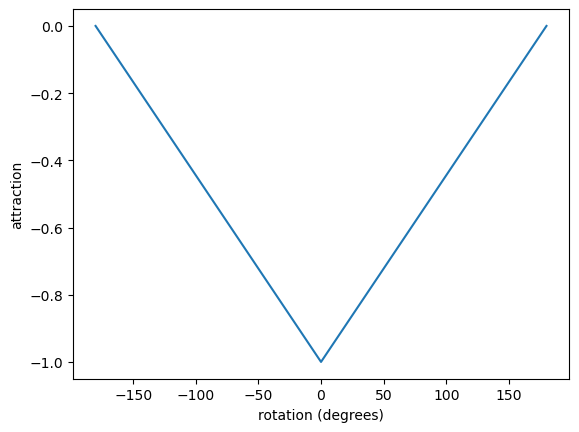

In [53]:
X, Y = [-180, 0, 180], [0, -1, 0]
plt.plot(X, Y)
plt.ylabel('attraction')
plt.xlabel('rotation (degrees)')
plt.show()

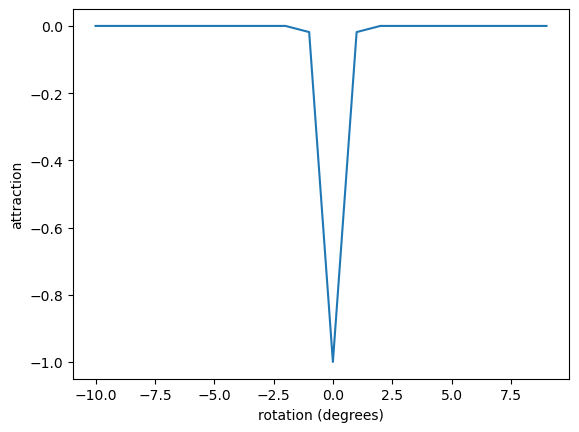

In [54]:
X = [i for i in range(-10, 10)]
Y = [-1 * math.exp(-4 * (x)**2) for x in X]
plt.plot(X, Y)
plt.ylabel('attraction')
plt.xlabel('rotation (degrees)')
plt.show()